In [1]:
import re
import pandas as pd
import os
import sys
import json
import numpy as np
%matplotlib inline
USER_ENV = '/Users/lguillain/Documents/EPFL2018/Semester-Project/' 
rootdir = USER_ENV + 'papers-import'

In [2]:
contents = []
i = 0
source = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'txt' in file:
            #print(subdir[len(rootdir):])
            i += 1
            path = os.path.join(subdir, file)
            with open(path) as file:
                #print(subdir)
                #print(text.read())
                try:
                    text = file.read()
                    contents.append(text)
                    source.append(subdir[len(rootdir):])
                except:
                    #Will fails for some files in python 3 .. still trying to find the issue
                    name, message, content = sys.exc_info()
                    print(message)

Using python 3:

In [3]:
contents[0]

"Exposing Piaget’s Scheme:\nEmpirical Evidence for the Ontogenesis of Coordination\nin Learning a Mathematical Concept\nDor Abrahamson, University of California, Berkeley, dor@berkeley.edu\nShakila Shayan, Utrecht University, s.shayan@uu.nl\nArthur Bakker, Utrecht University, A.Bakker4@uu.nl\nMarieke F. van der Schaaf, Utrecht University, M.F.vanderSchaaf@uu.nl\nAbstract: The combination of two methodological resources—natural-user interfaces (NUI)\nand multimodal learning analytics (MMLA)—is creating opportunities for educational\nresearchers to empirically evaluate seminal models for the hypothetical emergence of concepts\nfrom situated sensorimotor activity. 76 participants (9-14 yo) solved tablet-based non-symbolic\nmanipulation tasks designed to foster grounded meanings for the mathematical concept of\nproportional equivalence. Data gathered in task-based semi-structured clinical interviews\nincluded action logging, eye-gaze tracking, and videography. Successful task performance\n

In [4]:
schools = open(USER_ENV+'data/world_universities_and_domains.json').read()
parsed_json = json.loads(schools)

Number of schools in json

In [5]:
len(parsed_json)

9682

#### Rational for using email vs extracting institution from text:
- easier to parse from text
- unique / more robust to spelling changes

at most howmany domains are there per school?

In [6]:
max([len(j['domains']) for j in parsed_json])

3

In [7]:
mapping = {}
country_uni = {}
for j in parsed_json:
    mapping[j['domains'][0]] = j['name']
    country_uni[j['name']] = j['country']
    if len(j['domains']) > 1:
        mapping[j['domains'][1]] = j['name']
    if len(j['domains']) > 2:
        mapping[j['domains'][2]] = j['name']

In [8]:
#adding in the most common university names not in json
mapping['nie.edu.sg'] = "National Institute of Education (NIE), Singapore"
mapping['rub.de'] = "Ruhr-University Bochum"
mapping['uni-due.de'] = "Universität Duisburg-Essen"
mapping['collide.info'] = "Universität Duisburg-Essen"
mapping['dawsoncollege.qc.ca'] = "Dawson College"
mapping['dawsoncollege.ca'] = "Dawson College"
mapping['johnabbott.qc.ca'] = "John Abbott College"
mapping['johnabbott.ca'] = "John Abbott College"
mapping['vaniercollege.qc.ca'] = 'Vanier Colleege'

In [9]:
def get_school_from_mail(mail, mapping):
    """maps email to institution"""
    if mail in mapping:
        return (mapping[mail], mail)
    elif re.findall('[a-zA-Z0-9\-]*\.[a-zA-Z0-9\-]*$', mail)[0] in mapping:
        double = re.findall('[a-zA-Z0-9\-]*\.[a-zA-Z0-9\-]*$', mail)[0]
        return (mapping[double], double)
    else:
        triplet = re.findall('[a-zA-Z0-9\-]*\.[a-zA-Z0-9\-]*\.[a-zA-Z0-9\-]*$', mail)
        if len(triplet) > 0 and triplet[0] in mapping:
            return (mapping[triplet[0]], triplet[0])
        else:
            return (np.nan, mail)

In [10]:
institution = []
for text in contents:
    mails_in_paper = re.findall('[a-zA-Z0-9\.\-]*@[a-zA-Z0-9\.\-]*\.[a-zA-Z0-9\.\-]*(?!\S*\:\S*)', text)
    institution.append([(get_school_from_mail(m.split('@')[1].lower(), mapping), m, i) for i, m in enumerate(mails_in_paper)])

In [11]:
len(institution), len(contents)

(428, 428)

In [12]:
institution

[[(('University of California, Berkeley', 'berkeley.edu'),
   'dor@berkeley.edu',
   0),
  (('Utrecht University', 'uu.nl'), 's.shayan@uu.nl', 1),
  (('Utrecht University', 'uu.nl'), 'A.Bakker4@uu.nl', 2),
  (('Utrecht University', 'uu.nl'), 'M.F.vanderSchaaf@uu.nl', 3)],
 [],
 [(('University of California, Los Angeles', 'ucla.edu'),
   'deliema@g.ucla.edu',
   0),
  ((nan, 'gmail.com'), 'christine.lee.ucla@gmail.com', 1),
  (('University of California, Los Angeles', 'ucla.edu'),
   'enyedy@gseis.ucla.edu',
   2),
  (('University of California, Los Angeles', 'ucla.edu'),
   'randy@remap.ucla.edu',
   3),
  ((nan, 'gmail.com'), 'maggiedahn@gmail.com', 4),
  (('Indiana University at Bloomington', 'indiana.edu'),
   'asmsaleh@indiana.edu',
   5),
  (('Indiana University at Bloomington', 'indiana.edu'),
   'jdanish@indiana.edu',
   6),
  (('Indiana University', 'iu.edu'), 'mahumbur@umail.iu.edu', 7),
  (('Indiana University', 'iu.edu'), 'charmaho@umail.iu.edu', 8)],
 [],
 [((nan, 'gmail.co

In [13]:
inst = pd.DataFrame([(i[0][0],i[0][1], i[1],i[2], source[index]) for index, uni in enumerate(institution) for i in uni ], 
                    columns=['name', 'domain', 'mail','authorindex','file'])

In [14]:
inst.head(20)

,name,domain,mail,authorindex,file
0,"University of California, Berkeley",berkeley.edu,dor@berkeley.edu,0,/import2016full/61
1,Utrecht University,uu.nl,s.shayan@uu.nl,1,/import2016full/61
2,Utrecht University,uu.nl,A.Bakker4@uu.nl,2,/import2016full/61
3,Utrecht University,uu.nl,M.F.vanderSchaaf@uu.nl,3,/import2016full/61
4,"University of California, Los Angeles",ucla.edu,deliema@g.ucla.edu,0,/import2016full/59
5,NaN,gmail.com,christine.lee.ucla@gmail.com,1,/import2016full/59
6,"University of California, Los Angeles",ucla.edu,enyedy@gseis.ucla.edu,2,/import2016full/59
7,"University of California, Los Angeles",ucla.edu,randy@remap.ucla.edu,3,/import2016full/59
8,NaN,gmail.com,maggiedahn@gmail.com,4,/import2016full/59
9,Indiana University at Bloomington,indiana.edu,asmsaleh@indiana.edu,5,/import2016full/59


In [15]:
inst.shape

(1659, 5)

In [16]:
inst[inst['name'].isna()].shape

(289, 5)

1/5 are not found

In [17]:
inst[inst['name'].isna()].shape[0]/inst.shape[0]

0.17420132610006028

Quick look at the most productive universities:

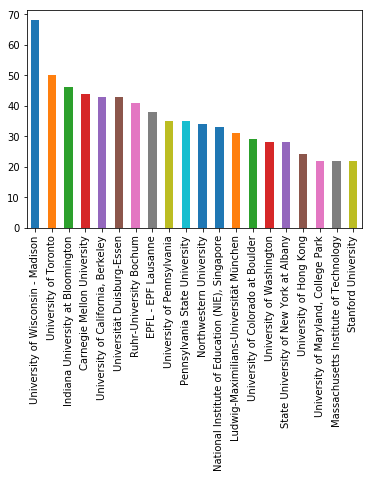

In [18]:
inst.name.value_counts().head(20).plot(kind='bar')

Most unfound (1/3) ones are gmail.
We can see that some universities that are common in here are missing from the university list!
There are some spelling errors :/
May use edit distance 1 or 2 to still parse maybe?

In [19]:
inst[inst['name'].isna()].domain.value_counts()

gmail.com                        118
ets.org                           11
concord.org                        8
moe.gov.sg                         8
hum.aau.dk                         5
moe.edu.sg                         5
iwm-kmrc.de                        4
govsacademy.org                    4
mheducation.com                    4
uni.no                             4
163.com                            3
aeres.nl                           3
griffith.edu.au                    3
acm.org                            3
wur.nl                             3
gnowledge.org                      3
cefet-rj.br                        3
sri.com                            3
me.com                             2
it.usyd.edu.au                     2
staff.ncad.ie                      2
gerrystahl.net                     2
terc.edu                           2
suzuki-lab.net                     2
senshu-u.jp                        2
imag.fr                            2
kubota-lab.net                     2
n

Here we can add the country:

In [20]:
inst['country'] = inst.name.map(country_uni)

In [21]:
inst.head()

,name,domain,mail,authorindex,file,country
0,"University of California, Berkeley",berkeley.edu,dor@berkeley.edu,0,/import2016full/61,United States
1,Utrecht University,uu.nl,s.shayan@uu.nl,1,/import2016full/61,Netherlands
2,Utrecht University,uu.nl,A.Bakker4@uu.nl,2,/import2016full/61,Netherlands
3,Utrecht University,uu.nl,M.F.vanderSchaaf@uu.nl,3,/import2016full/61,Netherlands
4,"University of California, Los Angeles",ucla.edu,deliema@g.ucla.edu,0,/import2016full/59,United States


In [22]:
inst.country.value_counts()

United States         747
Germany               118
Canada                 78
Switzerland            42
Israel                 34
Australia              32
Finland                32
Hong Kong              27
Japan                  26
Sweden                 22
United Kingdom         20
Netherlands            17
Romania                13
Norway                 12
China                   7
France                  7
Taiwan                  6
Turkey                  6
Korea, Republic of      5
Singapore               4
Spain                   3
Ireland                 2
Denmark                 2
India                   2
Cyprus                  2
Estonia                 1
South Africa            1
Philippines             1
Italy                   1
Iran                    1
Brazil                  1
Name: country, dtype: int64

In [23]:
inst.country.isna().sum()

387

We can again use the email to get some additional information:
- the final domain name indicates country

In [24]:
countries = open(USER_ENV+'data/country-by-domain-tld.json').read()
parsed_countries = json.loads(countries)

In [25]:
parsed_countries

[{'country': 'Afghanistan', 'tld': '.af'},
 {'country': 'Albania', 'tld': '.al'},
 {'country': 'Algeria', 'tld': '.dz'},
 {'country': 'American Samoa', 'tld': '.as'},
 {'country': 'Andorra', 'tld': '.ad'},
 {'country': 'Angola', 'tld': '.ao'},
 {'country': 'Anguilla', 'tld': '.ai'},
 {'country': 'Antarctica', 'tld': '.aq'},
 {'country': 'Antigua and Barbuda', 'tld': '.ag'},
 {'country': 'Argentina', 'tld': '.ar'},
 {'country': 'Armenia', 'tld': '.am'},
 {'country': 'Aruba', 'tld': '.aw'},
 {'country': 'Australia', 'tld': '.au'},
 {'country': 'Austria', 'tld': '.at'},
 {'country': 'Azerbaijan', 'tld': '.az'},
 {'country': 'Bahamas', 'tld': '.bs'},
 {'country': 'Bahrain', 'tld': '.bh'},
 {'country': 'Bangladesh', 'tld': '.bd'},
 {'country': 'Barbados', 'tld': '.bb'},
 {'country': 'Belarus', 'tld': '.by'},
 {'country': 'Belgium', 'tld': '.be'},
 {'country': 'Belize', 'tld': '.bz'},
 {'country': 'Benin', 'tld': '.bj'},
 {'country': 'Bermuda', 'tld': '.bm'},
 {'country': 'Bhutan', 'tld': '.

In [26]:
parsed_countries = { parsed['tld']: parsed['country'] for parsed in parsed_countries}
parsed_countries

{'.af': 'Afghanistan',
 '.al': 'Albania',
 '.dz': 'Algeria',
 '.as': 'American Samoa',
 '.ad': 'Andorra',
 '.ao': 'Angola',
 '.ai': 'Anguilla',
 '.aq': 'Antarctica',
 '.ag': 'Antigua and Barbuda',
 '.ar': 'Argentina',
 '.am': 'Armenia',
 '.aw': 'Aruba',
 '.au': 'Australia',
 '.at': 'Austria',
 '.az': 'Azerbaijan',
 '.bs': 'Bahamas',
 '.bh': 'Bahrain',
 '.bd': 'Bangladesh',
 '.bb': 'Barbados',
 '.by': 'Belarus',
 '.be': 'Belgium',
 '.bz': 'Belize',
 '.bj': 'Benin',
 '.bm': 'Bermuda',
 '.bt': 'Bhutan',
 '.bo': 'Bolivia',
 '.ba': 'Bosnia and Herzegovina',
 '.bw': 'Botswana',
 '.bv': 'Bouvet Island',
 '.br': 'Brazil',
 '.io': 'British Indian Ocean Territory',
 '.bn': 'Brunei',
 '.bg': 'Bulgaria',
 '.bf': 'Burkina Faso',
 '.bi': 'Burundi',
 '.kh': 'Cambodia',
 '.cm': 'Cameroon',
 '.ca': 'Canada',
 '.cv': 'Cape Verde',
 '.ky': 'Cayman Islands',
 '.cf': 'Central African Republic',
 '.td': 'Chad',
 '.cl': 'Chile',
 None: 'Yugoslavia',
 '.cx': 'Christmas Island',
 '.cc': 'Cocos (Keeling) Island

In [27]:
parsed_countries['.uk']= "United Kingdom"
parsed_countries['.us']  = "United States"

In [28]:
re.findall("(\.[a-zA-Z0-9]*$)",'ahaha.ad.uk')

['.uk']

In [29]:
inst.loc[inst.country.isna(), 'country'] = inst[inst.country.isna()].domain.map(lambda x: re.findall("(\.[a-zA-Z0-9]*$)",x)[0]).map(parsed_countries)

We can give a country to a large number of authors that way, keeping in mind that 118 are gmail adresses

In [30]:
inst.country.isna().sum()

203

In [31]:
inst[inst.country.isna()].domain.value_counts().head()

gmail.com          118
ets.org             11
concord.org          8
mheducation.com      4
govsacademy.org      4
Name: domain, dtype: int64

we can't say much about locationfrom the remaining emails, but we can use the letters before the extension as the organisation name! (unless it's gmail?)

In [32]:
inst[inst.country.isna()].domain.map(lambda x: re.findall("(\.[a-zA-Z0-9]*$)",x)[0]).value_counts()

.com      145
.org       37
.net       11
.edu        9
.swiss      1
Name: domain, dtype: int64

Looking at the countries again:

In [33]:
dominant_country = inst.groupby('file').country.value_counts()

In [34]:
hm = pd.DataFrame(data=dominant_country)
hm.columns = ['counts']
hm.reset_index().groupby('file').max().index.is_unique

True

Plotting by dominant nation for each paper:

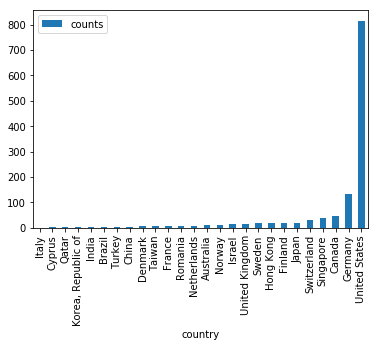

In [35]:
hm.reset_index().groupby('file').max().groupby('country').sum().sort_values('counts').plot(kind='bar')

In [36]:
inst.to_csv('universities.csv')

Just one thing to check: do both data sources differentiate between Hong Kong and China? Yes

# Now with this data we can do some stuff:
- Papers with authors of different origin
- use predominant nation to remake above plot - maybe papers in the us have more coauthors -> need to find some way to normalize data
- look at cross institution & cross country
- maybe even look at cross continent collaboration

#### Tinkering around to fine more info...

In [37]:
i = 5
text = contents[i]
source[i]

'/import2016full/50'

In [38]:
text

"The Effect of Concrete Materials on Children’s Subsequent\nNumerical Explanations: Metaphorical Priming\nAndrew Manches, University of Edinburgh Moray House School of Education, a.manches@ed.ac.uk\nMihaela Dragomir, University of Edinburgh School of Informatics, m.dragomir@sms.ed.ac.uk\nAbstract: This paper contributes evidence for the claim that gestures used to support numerical\nthinking can simulate prior concrete experiences. 114 children aged 6-9 years explained a\nnumerical relationship (additive composition) three times consecutively. All children explained\nwithout materials for the 1st and 3rd explanation. For the 2nd explanation, children were randomly\nassigned to one of three conditions to use: physical objects; a number line; or no materials\n(control condition) to explain their thinking. Findings showed how using physical objects\nsignificantly influenced the particular types of gestures (e.g. splitting), hand morphology (e.g.\npinching), and words (e.g. “take”, “big”) 

In [39]:
re.findall('[\ \S]*[a-zA-Z0-9\.\-]*@[a-zA-Z0-9\.\-]*\.[a-zA-Z0-9\.\-]*(?!\S*\:\S*)', text)

['Andrew Manches, University of Edinburgh Moray House School of Education, a.manches@ed.ac.uk',
 'Mihaela Dragomir, University of Edinburgh School of Informatics, m.dragomir@sms.ed.ac.uk']

In [40]:
re.findall('[\s\S]*Abstract', text)

['The Effect of Concrete Materials on Children’s Subsequent\nNumerical Explanations: Metaphorical Priming\nAndrew Manches, University of Edinburgh Moray House School of Education, a.manches@ed.ac.uk\nMihaela Dragomir, University of Edinburgh School of Informatics, m.dragomir@sms.ed.ac.uk\nAbstract']